In [69]:
import sqlite3
import json
from typing import List

def get_tags(db_path: str) -> List[str]:
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    cursor.execute("SELECT tags FROM tasks")
    all_tags = cursor.fetchall()
    
    tags_count = dict()
    for tag_json, in all_tags:
        tags_list = json.loads(tag_json)[0]
        for tag in tags_list:
            tags_count[tag] = tags_count.get(tag, 0) + 1
    
    conn.close()
    return tags_count

def get_answer_types(db_path: str) -> List[str]:
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    cursor.execute("SELECT answer_type FROM tasks")
    all_answer_types = cursor.fetchall()
    answer_types = dict()
    for answer_type, in all_answer_types:
        answer_types[answer_type] = answer_types.get(answer_type, 0) + 1
    conn.close()
    return answer_types

In [70]:
DEFAULT_DB_PATH = "../artifacts/tasks.db"

In [71]:
tags = get_tags(DEFAULT_DB_PATH)
high_level_tags = set()
for tag, count in sorted(tags.items()):
    print('-' * 10)
    print(f'Tag name: {tag}')
    print(f'Number of tasks: {count}')
    print('-' * 10)
    tag_id = tag.split()[0]
    high_level_tag = tag_id[:-2]
    high_level_tags.add(high_level_tag)
print(f'Total tags: {len(tags.keys())}')
print(f'Total high-level tags: {len(high_level_tags)}')

----------
Tag name: 3.2.3  Основные нормы современного литературного произношения: произношение безударных гласных звуков, некоторых согласных, сочетаний согласных. Произношение некоторых грамматических форм. Особенности произношения иноязычных слов. Нормы ударения в современном литературном русском языке
Number of tasks: 101
----------
----------
Tag name: 3.3.3  Основные лексические нормы современного русского литературного языка. Многозначные слова и омонимы, их употребление. Синонимы, антонимы, паронимы и их употребление. Иноязычные слова и их употребление. Лексическая сочетаемость. Тавтология. Плеоназм
Number of tasks: 154
----------
----------
Tag name: 3.5.2  Основные нормы употребления имён существительных: форм рода, числа, падежа
Number of tasks: 59
----------
----------
Tag name: 3.5.3  Основные нормы употребления имён прилагательных: форм степеней сравнения, краткой формы
Number of tasks: 59
----------
----------
Tag name: 3.5.4  Основные нормы употребления количественных,

In [72]:
answer_types = get_answer_types(DEFAULT_DB_PATH)
for answer_type, count in answer_types.items():
    print('-' * 10)
    print(f'Answer type: {answer_type}')
    print(f'Number of tasks: {count}')
    print('-' * 10)
print(f'Total answer types: {len(answer_types.keys())}')
print(f'Total tasks: {sum(answer_types.values())}')


----------
Answer type: Выбор ответов из предложенных вариантов
Number of tasks: 289
----------
----------
Answer type: Краткий ответ
Number of tasks: 880
----------
----------
Answer type: Установление соответствия
Number of tasks: 51
----------
Total answer types: 3
Total tasks: 1220


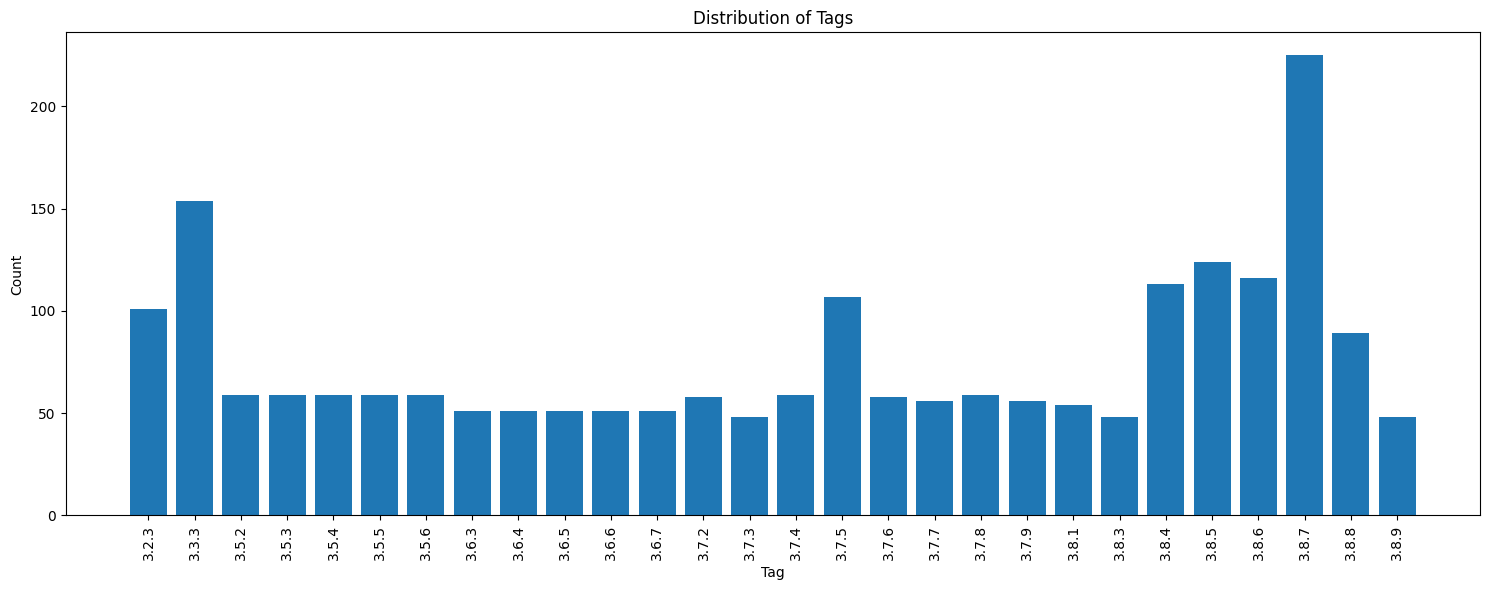

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
tag_names = []
tag_counts = []
for tag, count in sorted(tags.items()):
    tag_names.append(tag.split()[0])
    tag_counts.append(count)
plt.bar(tag_names, tag_counts)
plt.xticks(rotation=90)
plt.title('Distribution of Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../artifacts/tags_distribution.png')
plt.show()

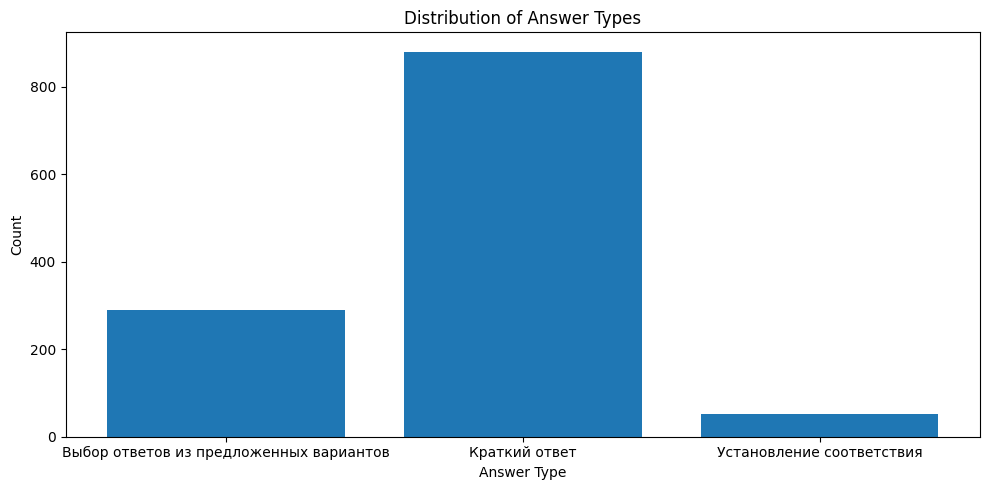

In [78]:
plt.figure(figsize=(10, 5))
plt.bar(answer_types.keys(), answer_types.values())
plt.title('Distribution of Answer Types')
plt.xlabel('Answer Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../artifacts/answer_types_distribution.png')
plt.show()
